In [8]:
import numpy as np
import matplotlib.style
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
plt.style.use('seaborn')

In [10]:
def loss(y_hot,p):
  l = -np.mean(y_hot*np.log(p))
  return l

def one_hot(y,n_classes):
  m = y.shape[0]
  y_hot = np.zeros((m,n_classes))

  y_hot[np.arange(m),y] = 1

  return y_hot

In [41]:
def softmax(a):
  z = np.exp(a)
  return z/np.sum(z,axis=1,keepdims=True)

class NeuralNet:
  def __init__(self,n_inputs=10,n_layers=2,layers=[5,6],n_outputs=2):
    model = {}
    
    model['w1'] = np.random.randn(n_inputs,layers[0])
    model['b1'] = np.zeros((1,layers[0]))

    model['w2'] = np.random.randn(layers[0],layers[1])
    model['b2'] = np.zeros((1,layers[1]))

    model['w3'] = np.random.randn(layers[1],n_outputs)
    model['b3'] = np.zeros((1,n_outputs))

    self.model = model
  
  def forwardProp(self,X):
    w1,w2,w3 = self.model['w1'],self.model['w2'],self.model['w3']
    b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']

    z1 = np.dot(X,w1) + b1
    a1 = np.tanh(z1)

    z2 = np.dot(z1,w2) + b2
    a2 = np.tanh(z2)

    z3 = np.dot(a2,w3) + b3
    a3 = softmax(z3)

    self.activations = (a1,a2,a3)
    return a3

  def backProp(self,X,y,learning_rate=0.01):
    w1,w2,w3 = self.model['w1'],self.model['w2'],self.model['w3']
    b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
    m = float(X.shape[0])
    a1,a2,a3 = self.activations

    delta3 = a3 - y
    dw3 = np.dot(a2.T,delta3)
    db3 = np.sum(delta3,axis=0)/m

    delta2 = np.dot(delta3,w3.T)*(1-np.square(a2))
    dw2 = np.dot(a1.T,delta2)
    db2 = np.sum(delta2,axis=0)/m

    delta1 = np.dot(delta2,w2.T)*(1-np.square(a1))
    dw1 = np.dot(X.T,delta1)
    db1 = np.sum(delta1,axis=0)/m

    self.model['w1'] -= learning_rate*dw1
    self.model['b1'] -= learning_rate*db1

    self.model['w2'] -= learning_rate*dw2
    self.model['b2'] -= learning_rate*db2

    self.model['w3'] -= learning_rate*dw3
    self.model['b3'] -= learning_rate*db3

  def predict(self,x):
    y_out = self.forward(x)
    return np.argmax(y_out,axis=1)

  def train(self,X,y,learning_rate,epochs=20,logs=True):
    training_loss = []
    n_classes = np.unique(y).shape[0]
    y_hot = one_hot(y,n_classes)
    
    for i in range(epochs):
      y_ = self.forwardProp(X)
      l = loss(y_hot,y_)
      training_loss.append(l)
      self.backProp(X,y_hot,learning_rate) 

      if logs:
        print(f'Epoch: {i}, Loss: {l}')
    return training_loss
  
  def summary(self):
    w1,w2,w3 = self.model['w1'],self.model['w2'],self.model['w3']
    a1,a2,a3 = self.activations

    print('w1',w1.shape)
    print('a1',a1.shape)

    print('w2',w2.shape)
    print('a2',a2.shape)

    print('w3',w3.shape)
    print('a3',a3.shape)

In [42]:
X,y = make_circles(n_samples=500,random_state=42)
print(X.shape,y.shape)

(500, 2) (500,)


In [43]:
model = NeuralNet(n_inputs=2,n_layers=2,layers=[10,5],n_outputs=2)

In [44]:
l = model.train(X,y,0.001,500)

Epoch: 0, Loss: 0.6262411807601559
Epoch: 1, Loss: 0.49977114099338416
Epoch: 2, Loss: 0.4355766859057599
Epoch: 3, Loss: 0.4022811221605638
Epoch: 4, Loss: 0.3845669697305385
Epoch: 5, Loss: 0.3742964553992807
Epoch: 6, Loss: 0.36749999936877714
Epoch: 7, Loss: 0.36251154395756896
Epoch: 8, Loss: 0.35869177285263604
Epoch: 9, Loss: 0.35576109598224914
Epoch: 10, Loss: 0.35354310824706864
Epoch: 11, Loss: 0.3518933225487387
Epoch: 12, Loss: 0.35068636364797146
Epoch: 13, Loss: 0.3498155290888296
Epoch: 14, Loss: 0.34919328064679594
Epoch: 15, Loss: 0.34875060634334953
Epoch: 16, Loss: 0.3484351255689992
Epoch: 17, Loss: 0.34820837385183345
Epoch: 18, Loss: 0.34804285407746294
Epoch: 19, Loss: 0.3479193119858913
Epoch: 20, Loss: 0.3478244699994925
Epoch: 21, Loss: 0.34774927118278526
Epoch: 22, Loss: 0.34768758286648266
Epoch: 23, Loss: 0.34763527106565956
Epoch: 24, Loss: 0.3475895547822503
Epoch: 25, Loss: 0.34754856279099994
Epoch: 26, Loss: 0.3475110328547333
Epoch: 27, Loss: 0.3474

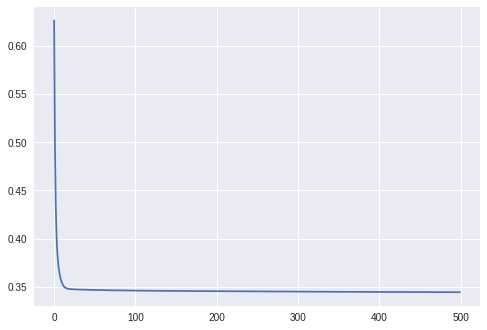

In [45]:
plt.plot(l)
plt.show()